## Analysis of the number of compositions in the comparison algorithm

In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

$c_n=\frac{2 n+1}{4^n}\left(\begin{array}{c}
2 n \\
n
\end{array}\right)$

In [2]:
def cn(n):
    numerator = 2*n + 1
    denominator = 4**n
    binomial_coeff = math.comb(2*n, n)
    return numerator * binomial_coeff / denominator


n=3
c3 = cn(n)
c3

2.1875



To achieve an error bounded by $2^{-\alpha}$ it must hold that:
- $d\geq\frac{1}{\log c_n} \cdot \log (1 / \epsilon)+\frac{1}{\log (n+1)} \cdot \log (\alpha-2)$

To achieve the same error using the fast convergence version, it must hold that:
- $d_g \geq \frac{1/2+O(1)}{\log c_n}\cdot \log(1/\epsilon) + O(1)$ 
- $d_f \geq\frac{1}{\log n}\cdot \log(\alpha -2) + O(1)$




In [3]:
d=[]
df_dg=[]
epsilons = [0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000001,0.0000001]

def compute_d(n, cn, alpha, epsilon):
    log_c_n = np.log2(cn)
    log_epsilon = np.log2(1/epsilon)
    log_n_plus_1 = math.log2(n + 1)
    log_alpha_minus_2 = math.log2(alpha - 2)
    return (1/log_c_n) * log_epsilon + (1/log_n_plus_1) * log_alpha_minus_2


def compute_dg(cn, epsilon):
    log_c_n = np.log2(cn)
    log_epsilon = np.log2(1/epsilon)
    return (0.5/log_c_n) * log_epsilon

def compute_df(n, alpha):
    log_n = np.log2(n)
    log_alpha_minus_2 = math.log2(alpha - 2)
    return (1/log_n) * log_alpha_minus_2

alpha=10
print("e  |      d         |      dg        | df")
for e in epsilons:
    print(e,compute_d(n,c3,alpha,e),compute_dg(c3,e),compute_df(n,alpha))
    d.append(math.ceil(compute_d(n,c3,alpha,e)))
    df_dg.append( math.ceil(compute_dg(c3,e)) + math.ceil(compute_df(n,alpha)))

e  |      d         |      dg        | df
0.1 4.441625832534104 1.4708129162670522 1.8927892607143726
0.05 5.327143444146902 1.9135717220734507 1.8927892607143726
0.01 7.383251665068209 2.9416258325341045 1.8927892607143726
0.005 8.268769276681006 3.384384638340503 1.8927892607143726
0.001 10.324877497602314 4.412438748801157 1.8927892607143726
0.0005 11.210395109215112 4.855197554607556 1.8927892607143726
0.0001 13.266503330136418 5.883251665068209 1.8927892607143726
5e-05 14.152020941749216 6.326010470874608 1.8927892607143726
1e-05 16.208129162670524 7.354064581335262 1.8927892607143726
1e-06 19.149754995204628 8.824877497602314 1.8927892607143726
1e-07 22.091380827738732 10.295690413869366 1.8927892607143726


In [4]:
print("d:",d)
print("df+dg:",df_dg)

d: [5, 6, 8, 9, 11, 12, 14, 15, 17, 20, 23]
df+dg: [4, 4, 5, 6, 7, 7, 8, 9, 10, 11, 13]


In [5]:
log_epsilon = []

for eps in epsilons:
    log_eps = math.log2(eps)
    log_epsilon.append(-log_eps)

log_epsilon

[3.321928094887362,
 4.321928094887363,
 6.643856189774724,
 7.643856189774724,
 9.965784284662087,
 10.965784284662087,
 13.287712379549449,
 14.287712379549449,
 16.609640474436812,
 19.931568569324174,
 23.253496664211536]

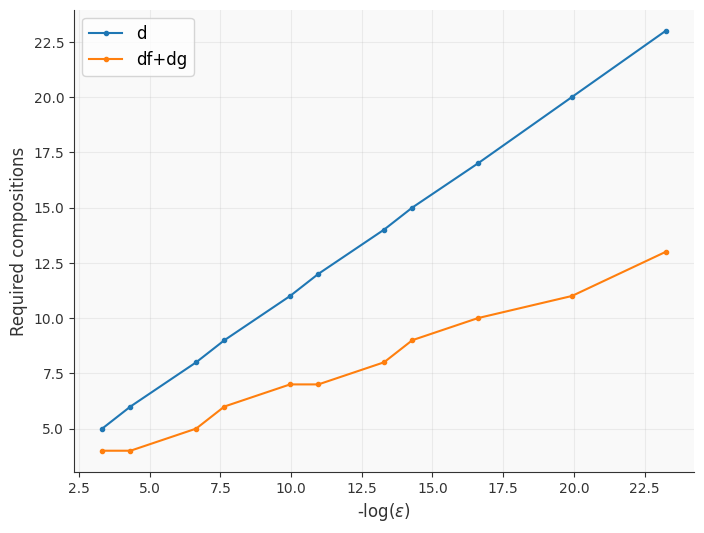

In [7]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('#f9f9f9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
ax.tick_params(axis='both', colors='#333333')
ax.grid(alpha=0.2)


ax.plot(log_epsilon, d, label='d', marker='.', color='#1f77b4')
ax.plot(log_epsilon, df_dg, label='df+dg', marker='.', color='#ff7f0e')


ax.legend(frameon=True, loc='upper left', fontsize=12)


ax.set_xlabel(r'-$\log(\epsilon)$', fontsize=12, color='#333333')
ax.set_ylabel('Required compositions', fontsize=12, color='#333333')

plt.savefig('compositions_plot_v2.pdf', format='pdf', bbox_inches='tight')